# Math 76 HW4, Fall 2024

**Name:**

For all plots, make sure to include a title, x-axis label, and y-axis label.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy # import Cauchy for random number generation


from hw5_helper_funcs import *

# Problem 1

*(no code has been provided for this problem)*

# Problem 2

## Part A

Implement the rejection sampling algorithm for generating random samples of $X$ (*hint: use a Cauchy distribution as the enveloping distribution*). An oracle function `bimodal_distribution(n samples, gamma, c)` is provided for generating samples from the desired distribution. Compare the histograms of (1) your samples generated with the rejection sampling algorithm and (2) samples generated by the oracle bimodal `distribution(n samples, gamma, c)` function, checking that they agree (this validates your implementation). *Bonus: why must one use the Cauchy distribution instead of a Gaussian distribution?*

In [18]:
# Parameters
gamma = 0.1
c = 5.0

# Rejection sampling
f = lambda x: 1.0/( ( (x-c)**2 + gamma**2 )*( (x+c)**2 + gamma**2 )  ) # proportional 
g = lambda x: (gamma/np.pi)*(1.0/( x**2 + gamma**2 ) ) 
M = (np.pi/(8*(gamma**3)*c))*(c + np.sqrt(c**2 + 4*(gamma**2)))

n_tries = 1000000
samples = []
for j in range(n_tries):
    # Random uniform grad
    u = np.random.uniform()
    x = cauchy.rvs(loc=0, scale=gamma)

    if u <= f(x)/(M*g(x)):
        samples.append(x)
    else:
        pass

acceptance_rate = 100*len(samples)/n_tries
print(f"Acceptance rate: {acceptance_rate:.2f}%")

Acceptance rate: 0.08%


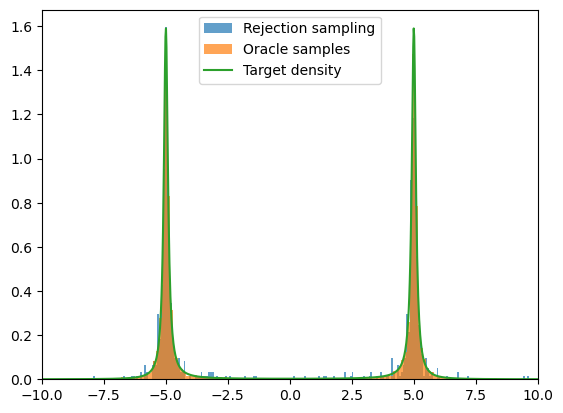

In [20]:
# Plot histogram of samples
plt.hist(samples, density=True, label="Rejection sampling", bins=300, alpha=0.7)

# Also plot oracle samples
oracle_samples = bimodal_distribution(10000, gamma, c)
plt.hist(oracle_samples, density=True, label="Oracle samples", bins=300, alpha=0.7)

# Plot density
dom = np.linspace(-10,10,1000)
f_log = lambda x: bimodal_logp(x, c, gamma) # this is log of normalized density
rang = np.exp(f_log(dom))
plt.plot(dom, rang, label="Target density")
plt.xlim(-10,10)

plt.legend()
plt.show()

In [34]:
dom = np.linspace(-10,10,10000)
plt.plot(dom, f(dom), label="Unnormalized bimodal")
plt.plot(dom, M*g(dom), label="Cauchy umbrella")
plt.yscale("log")
plt.legend()
plt.show()

## Part B

Implement the random walk Metropolis-Hastings algorithm for generating random
samples of $X$ (*hint: use a Gaussian or Cauchy proposal distribution*). Again, validate your implementation using samples generated with the oracle `bimodal_distribution(n samples, gamma, c)` function.

In [28]:
# Problem inputs
gamma = 10.0
c = 5.0

# MCMC inputs
n_samples = 10000
prop_sigma = 0.1 # proposal standard deviation
x0 = -5.0 # initialization
f_log = lambda x: bimodal_logp(x, c, gamma)
# Random walk Metropolis-Hastings
x_current = x0
samples = [x_current]
n_accepted = 0
log_f_current = f_log(x_current)  # Log density of the initial point

for i in range(n_samples):

    # Propose a new sample
    x_proposed = np.random.normal(loc=x_current, scale=prop_sigma)
    log_f_proposed = f_log(x_proposed)  # Log density of the proposed point

    # Compute the log acceptance ratio
    log_acceptance_ratio = log_f_proposed - log_f_current

    # Accept or reject the proposal
    if np.log(np.random.rand()) < log_acceptance_ratio:
        x_current = x_proposed  # Accept the proposal
        n_accepted += 1
        log_f_current = log_f_proposed  # Update the log density

    samples.append(x_current)  # Record the current sample

acceptance_rate = n_accepted/n_samples
print(f"Acceptance rate: {100*acceptance_rate:.2f}%")

Acceptance rate: 99.79%


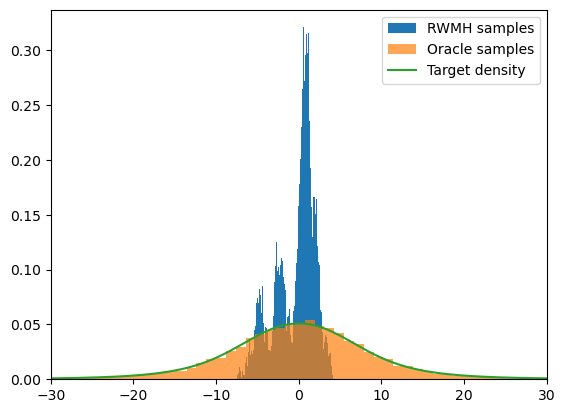

In [29]:
# Plot histogram
plt.hist(samples, density=True, label="RWMH samples", bins=int(len(samples)/100))

# Also plot oracle samples
oracle_samples = bimodal_distribution(10000, gamma, c)
plt.hist(oracle_samples, density=True, label="Oracle samples", bins=300, alpha=0.7)

# Plot density
dom = np.linspace(-30,30,1000)
rang = np.exp(f_log(dom))
plt.plot(dom, rang, label="Target density")
plt.xlim(-30,30)

plt.legend()
plt.show()

## Part C

Depending on the choice of $c$ and $\gamma$, the distribution is either unimodal or bimodal.
Show the results from Part 1 and Part 2 for both a unimodal (e.g., $\gamma = 10$, $c = 5$)
and bimodal choice of the parameters (e.g., $\gamma = 0.1, c = 5$). Discuss any qualitative
differences in the performance of rejection sampling and random walk MetropolisHastings. For random walk Metropolis-Hastings and bimodal case, experiment with changing the proposal noise variance $\sigma_{\text{prop}}^2$ and comment on what you observe.

**Response:** 